**EEG based depression detection**
**DATA PRE-PROCESSING **

 **installing necessary libraries**

**MNE library: For processing MAT files prepared in MATLAB of EEG signals**

In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 6.7 MB/s 


**ANTROPY library: For processing non-linear features of EEG signals**

In [ ]:
pip install antropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48 kB 3.2 MB/s 
     |████████████████████████████████| 33.8 MB 2.0 MB/s 
  Created wheel for antropy: filename=antropy-0.1.5-py3-none-any.whl size=16897 sha256=d1e41510c9a1f2b842dd414901fb21ac92aac0e4084baab3804e69431948134c
  Stored in directory: /root/.cache/pip/wheels/82/7e/6b/683a215d168d889bb7917d1e571174201e89c7b9c2d86b981e
Successfully built antropy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


**importing required libraries**

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import butter, lfilter
import mne
import pandas as pd
import numpy as np
import antropy as ant
import seaborn as sns

**connecting google drive to import datastore**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EEG signal collected from 128 channel montage for two states 1: rest 2: under stimulus**

**visualizing Montage position of elctrodes on head**

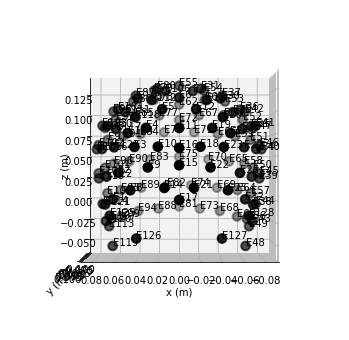

['E36',
 'E104',
 'E24',
 'E124',
 'E33',
 'E122',
 'E22',
 'E9',
 'E70',
 'E83',
 'E52',
 'E92',
 'E45',
 'E108',
 'E58',
 'E96']

In [ ]:
EEG_signal_capture_head_montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
fig = EEG_signal_capture_head_montage.plot(kind='3d',scale_factor = 10)
electrodes_for_voltage_capture = {'C3':'E36','C4':'E104','F3':'E24','F4':'E124','F7':'E33','F8':'E122',
                 'FP1':'E22','FP2':'E9','O1':'E70','O2':'E83','P3':'E52','P4':'E92',
                 'T3-T7':'E45','T4-T8':'E108','T5-P7':'E58','T6-P8':'E96'}
Electrodes_locations = {'Left-Central':'E36','Right-Central':'E104','Front-Left':'E24','Front-Right':'E124',
                           'Front-Far left':'E33','Front-Far Right':'E122',
                           'Forehead (above left eye)':'E22','Forehead (above Right eye)':'E9',
                           'Back-left to Center':'E70','Back-Right to Center':'E83','Back-Above E70':'E52',
                           'Back-Above E83':'E92','Side Left':'E45','Side Right':'E108','Left':'E58','Right':'E96'}
list(electrodes_for_voltage_capture.values())


**visualizing EEG signal recorded in resting state**

**function to import and read mat file**

In [ ]:

def EEG_MAT_FILE_READ(path="/content/drive/MyDrive/EEG_preprocessing_datastore/EEG_resting_state_data.mat"):

    channels = ['E'+str(i+1) for i in range(128)]
    frequency = 250 #hz
    EEG_SIGNAL_MAT_FILE = scipy.io.loadmat(path)
    key = list(EEG_SIGNAL_MAT_FILE.keys())
    MAT_FILE_DATA = key[3]
    a_mat = EEG_SIGNAL_MAT_FILE[MAT_FILE_DATA]
    signals_data = mne.create_info(ch_names= channels,
                       ch_types='eeg', verbose=None,
                       sfreq=frequency)
    data_store = mne.io.RawArray(a_mat[:-1,:], signals_data)

    data_store.set_montage(EEG_signal_capture_head_montage)
  
    data_store.plot_psd()
    return data_store      

Creating RawArray with float64 data, n_channels=128, n_times=8000
    Range : 0 ... 7999 =      0.000 ...    31.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


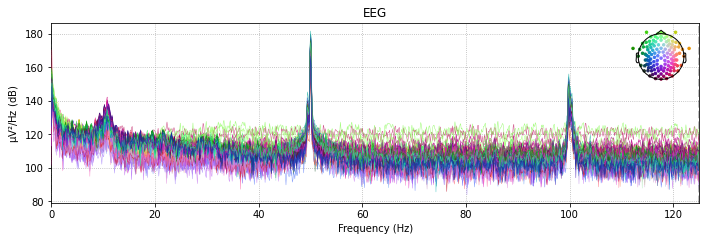

In [ ]:
EEG_resting_datastore = EEG_MAT_FILE_READ()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


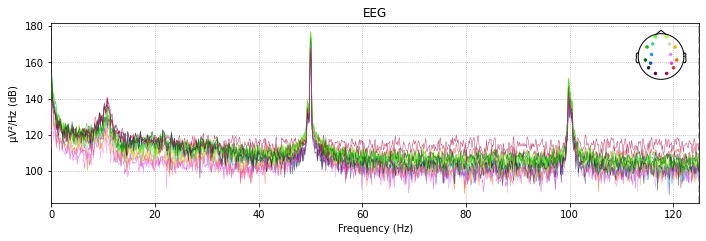

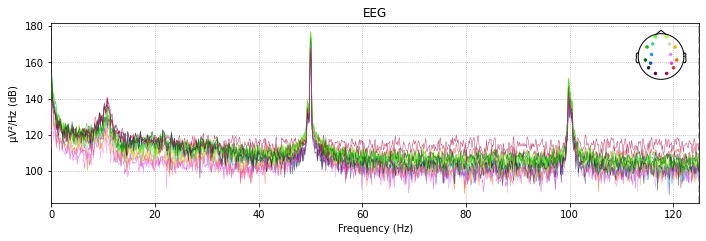

In [ ]:
EEG_resting_datastore.pick_channels(list(electrodes_for_voltage_capture.values())).plot_psd()

**pre-processing**

**Sinc FIR filter: To remove noise from signal**

In [ ]:
def sinc_fir_filter(signals_data):
  signals_data =signals_data.copy().load_data()
  filtered_data = signals_data.filter(frequency,h_freq,method = 'fir',fir_window = 'hamming')
  return filtered_data

**filter parameters**

In [ ]:

frequency = 1


Initial Power distribution
After filtering - Power distribution
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


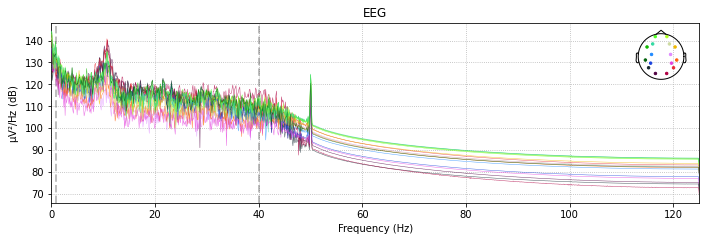

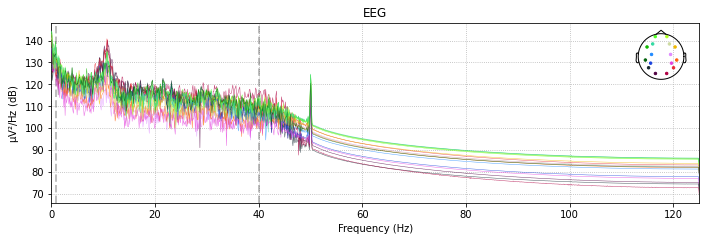

In [ ]:
print("Initial Power distribution")
print("After filtering - Power distribution")
EEG_RESTING_FILTERED_DATASTORE = sinc_fir_filter(EEG_resting_datastore)
EEG_RESTING_FILTERED_DATASTORE.plot_psd()

**Band pass filter: remove noise and convert signal into numpy array**

In [ ]:
def bandpass(data):

  sampling_frequency = 256                                
  EEG_SIGNAL_BANDS = {'delta':(1,4),
               'Theta': (4, 8),
               'Alpha': (8, 12),
               'Beta': (12, 30),
               'Gamma': (30, 45),
               'Normal':(0,40)}
  frequency_fft_filter = np.absolute(np.fft.rfft(data))
  amplitude_frequency_fft = np.fft.rfftfreq(len(data), 1.0/sampling_frequency)

  # Take the mean of the fft amplitude for each EEG band
  eeg_band_mean = dict()
  eeg_band_median = dict()
  eeg_band_max = dict()
  eeg_band_min = dict()
  eeg_band_fft = dict()
  for band in EEG_SIGNAL_BANDS:  
    freq_ix = np.where((amplitude_frequency_fft >= EEG_SIGNAL_BANDS[band][0]) & 
                      (amplitude_frequency_fft <= EEG_SIGNAL_BANDS[band][1]))[0]
    eeg_band_fft[band] = np.mean(frequency_fft_filter[freq_ix])
    eeg_band_median[band] = np.median(frequency_fft_filter[freq_ix])
    eeg_band_mean[band] = np.mean(frequency_fft_filter[freq_ix])
    eeg_band_max[band] = np.max(frequency_fft_filter[freq_ix])
    eeg_band_min[band] = np.min(frequency_fft_filter[freq_ix])

  return eeg_band_mean,eeg_band_median,eeg_band_max,eeg_band_min,eeg_band_fft

**Feature engineering:linear and non-linear features**

**linear features:**
**1:power**
**2:amplitude**

In [ ]:
def linear_features(datastore,prefix):

  d = datastore.get_data()  
  channel_names = datastore.ch_names
  features_dictionary = dict()
  for i in np.arange(d.shape[0]):
      data = d[i,:]
      eeg_band_mean,eeg_band_median,eeg_band_max,eeg_band_min,eeg_band_fft = bandpass(data)
      mean = eeg_band_mean['Normal']
      max = eeg_band_max['Normal']
      min = eeg_band_min['Normal']
      median = eeg_band_median['Normal']
      alpha = eeg_band_fft['Alpha']
      beta = eeg_band_fft['Beta']
      delta = eeg_band_fft['delta']
      theta = eeg_band_fft['Theta']
      objects = [alpha, beta, delta,theta,mean,max,min,median]
      features_dictionary[channel_names[i]] = objects
  result = pd.DataFrame(features_dictionary).T
  result.columns = ['lf_alpha_'+prefix,'lf_beta_'+prefix,'lf_delta_'+prefix,'lf_theta_'+prefix,'lf_mean_'+prefix,'lf_max_'+prefix,'lf_min_'+prefix,'lf_median_'+prefix]
  return result

**linear features visualization**

In [ ]:
linear_features(EEG_resting_datastore,'one_pat').head()

,lf_alpha_one_pat,lf_beta_one_pat,lf_delta_one_pat,lf_theta_one_pat,lf_mean_one_pat,lf_max_one_pat,lf_min_one_pat,lf_median_one_pat
E9,1875.276458,549.464641,2901.380098,1367.535960,18576.888899,2.132937e+07,21.852823,600.045377
E22,1962.344324,564.344696,2103.001899,1128.255877,5045.360363,4.711530e+06,11.292816,582.253467
E24,1829.038390,500.105839,1683.582830,920.839226,19974.846182,2.365145e+07,27.258894,528.262270
E33,1762.225038,655.299494,3190.643405,1483.650170,21054.315858,2.431015e+07,33.866445,662.574884
E36,1290.414086,442.475702,1464.350040,821.077427,10529.862183,1.211437e+07,11.256188,428.169135


**non-linear features**
**1:spectral entropy**
**2:Singular-value deposition entropy**

In [ ]:

def non_linear_features(datastore,prefix):

  ch_names = datastore.ch_names
  features_dictionary = dict()
  overall = sinc_fir_filter(datastore.copy())
  d = overall.get_data()  
  for i in range(d.shape[0]):
    signal = d[i,:]
    svd_entropy = ant.svd_entropy(signal, normalize=True)
    spectral_entropy = ant.spectral_entropy(signal, sf=250, method='welch', normalize=True)
    perm_entropy = ant.perm_entropy(d[i,:], normalize=True)
    objects = [svd_entropy,spectral_entropy,perm_entropy]
    features_dictionary[ch_names[i]] = objects
  result = pd.DataFrame(features_dictionary).T
  result.columns = ['nl_svden_'+prefix,'nl_spec_en'+prefix,'nl_permen'+prefix]
  return result  

**non-linear features visualization**

In [ ]:
non_linear_features(EEG_resting_datastore,'one_pat').head()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


,nl_svden_one_pat,nl_spec_enone_pat,nl_permenone_pat
E9,0.460683,0.385432,0.781321
E22,0.460976,0.423530,0.769295
E24,0.456698,0.379321,0.778964
E33,0.452907,0.395446,0.779078
E36,0.460703,0.450232,0.770696


**Features datastore after cleaning**

File name  EEG_resting_state_data.mat Position  0
Creating RawArray with float64 data, n_channels=128, n_times=8000
    Range : 0 ... 7999 =      0.000 ...    31.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    0.1s finished


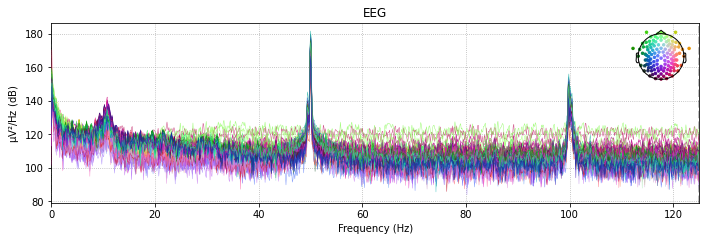

In [ ]:
features_stored = pd.DataFrame()

for root, dirs, files in os.walk("/content/drive/MyDrive/EEG_preprocessing_datastore/"):
  folder = "/content/drive/MyDrive/EEG_preprocessing_datastore//"
  for index, file in enumerate(files):
      if file[-3:]=='mat':
        print("File name ",file,"Position ",index)
        fin = str(folder)+"/"+str(file)
        features_stored = EEG_MAT_FILE_READ(path=fin)
        linear_features_datastore = linear_features(features_stored,'resting')
        non_linear_features_datastore = non_linear_features(features_stored,'resting')
        solution = pd.concat([linear_features_datastore,non_linear_features_datastore],axis = 1)
        solution = solution[solution.index.isin(list(electrodes_for_voltage_capture.values()))]
        result_single_row = pd.DataFrame()
        for i in list(electrodes_for_voltage_capture.values()):
          temp = pd.DataFrame(solution[solution.index == i].values)
          temp.columns = [j+'_'+i for j in solution.columns]
          result_single_row = pd.concat([result_single_row,temp],axis = 1) 
        result_single_row['patient_identifier'] = file
        del features_stored

Creating RawArray with float64 data, n_channels=128, n_times=8000
    Range : 0 ... 7999 =      0.000 ...    31.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


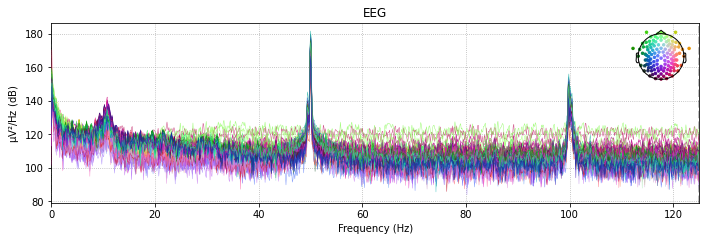

In [ ]:
features_stored = pd.DataFrame()
ints = list(range(1,129))
ch_names = ['E'+str(int) for int in ints]

for root, dirs, files in os.walk("/content/drive/MyDrive/EEG_preprocessing_datastore/"):
  folder = "/content/drive/MyDrive/EEG_preprocessing_datastore/"
  for index, file in enumerate(files):
      if file[-3:]=='mat':
        fin = str(folder)+"/"+str(file)
        EEG_RESTING_FILTERED_DATASTORE = EEG_MAT_FILE_READ(path=fin)
        solution = EEG_RESTING_FILTERED_DATASTORE.get_data()
        datastore_features = pd.DataFrame(data = solution.T, columns = ch_names)
        datastore_features = datastore_features.filter(items=list(electrodes_for_voltage_capture.values()))
        datastore_features.reset_index(inplace = True)
        datastore_features = datastore_features.rename(columns = {'index': 'Time'})
        datastore_features['patient'] = file[:8]
        # Loading only 30 secs of data
        datastore_features = datastore_features.iloc[14999:22999,:]
        features_stored = pd.concat([features_stored,datastore_features],axis = 0)



**storing features in csv file**

In [ ]:
features_stored.to_csv('/content/drive/MyDrive/EEG_preprocessing_datastore/features.csv',index = False)

**features visualization**

In [ ]:
features_datastore_rest = pd.read_csv('/content/drive/MyDrive/EEG_preprocessing_datastore/Features_REST_state.csv')
features_datastore_rest['patient_identifier']= [i[:8] for i in features_datastore_rest['patient_identifier']]
features_datastore_rest['patient_identifier'] = features_datastore_rest['patient_identifier'].astype(int)
print("# of Patients:"+str(features_datastore_rest.shape[0]))
print("# of Electrode:16")
print("\n***Rest of the Features***")
print("# of Other Features:"+str(714-len([i for i in features_datastore_rest.columns if 'nl' in i or 'lf' in i])))
features_datastore_rest.head()

# of Patients:53
# of Electrode:16

***Rest of the Features***
# of Other Features:538


,lf_alpha_resting_E36,lf_beta_resting_E36,lf_delta_resting_E36,lf_theta_resting_E36,lf_mean_resting_E36,lf_max_resting_E36,lf_min_resting_E36,lf_median_resting_E36,nl_svden_resting_E36,nl_spec_enresting_E36,...,lf_delta_resting_E96,lf_theta_resting_E96,lf_mean_resting_E96,lf_max_resting_E96,lf_min_resting_E96,lf_median_resting_E96,nl_svden_resting_E96,nl_spec_enresting_E96,nl_permenresting_E96,patient_identifier
0,4884.613979,2278.624552,17200.055374,6866.060694,89740.273531,9.384269e+08,63.744193,2163.662325,0.522139,0.622730,...,10967.780996,6948.776700,41233.978648,3.930679e+08,5.355479,2948.788517,0.521534,0.553742,0.727733,2010002
1,4449.706266,2262.541526,19716.190512,7544.042248,76589.372973,7.777201e+08,96.528437,2274.685941,0.521945,0.566196,...,41740.250813,15827.252140,98990.529205,8.957127e+08,123.507787,4814.944812,0.573827,0.646714,0.780744,2010004
2,2535.166056,2705.244726,5962.754681,2638.860812,21714.444838,2.003181e+08,5.312277,2711.105520,0.670677,0.683835,...,11533.986552,4876.374359,13497.246134,6.684807e+07,69.096552,3490.536240,0.568535,0.614972,0.806063,2010005
3,4719.376369,2299.826126,16074.572713,6303.707905,48324.405457,4.815979e+08,21.432547,2347.665332,0.572527,0.640041,...,18683.117672,7575.423961,64030.047305,6.423434e+08,12.892636,3463.923658,0.532926,0.496539,0.684586,2010006
4,7827.445436,3818.779974,33842.519264,12699.762977,71679.363955,6.715888e+08,788.428172,3719.177604,0.385161,0.449255,...,79698.436736,29945.553683,111923.551768,8.038292e+08,414.748991,8716.870511,0.293716,0.339961,0.692474,2010008


In [ ]:
for i in ['resting']:
  for j in ['alpha','beta','delta','theta']:
    features_datastore_rest['lf'+'_'+i+'_'+j] = np.mean(features_datastore_rest[[x for x in features_datastore_rest.columns if 'lf' in x and i in x and j in x]],axis = 1)

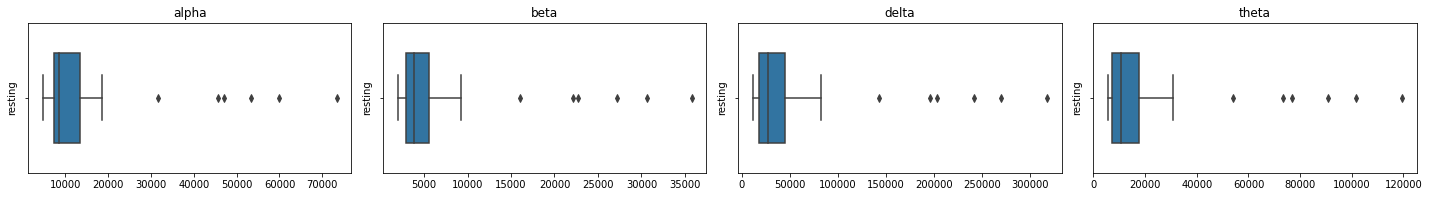

In [ ]:
fig = plt.figure(figsize=(20,10))
a = dict()
i = 0
for emotion in ['resting']:
  for signal in ['alpha','beta','delta','theta']:
    a[i] = fig.add_subplot(4,4,i+1)
    sns.boxplot(x='lf'+'_'+emotion+'_'+signal,data = features_datastore_rest,width=.6,ax = a[i])
    a[i].set(ylabel=emotion,xlabel = '',title = signal)
    i = i + 1
fig.tight_layout()

In [ ]:
for i in ['resting']:
  for j in ['mean','median','min','max',]:
    features_datastore_rest['lf'+'_'+i+'_'+j] = np.mean(features_datastore_rest[[x for x in features_datastore_rest.columns if 'lf' in x and i in x and j in x]],axis = 1)

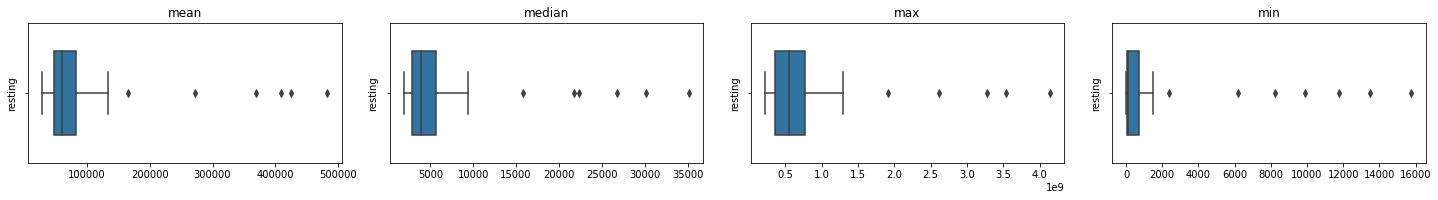

In [ ]:
fig = plt.figure(figsize=(20,10))
a = dict()
i = 0
for emotion in ['resting']:
  for signal in ['mean','median','max','min']:
    a[i] = fig.add_subplot(4,4,i+1)
    sns.boxplot(x='lf'+'_'+emotion+'_'+signal,data = features_datastore_rest,width=.6,ax = a[i])
    a[i].set(ylabel=emotion,xlabel = '',title = signal)
    i = i + 1
fig.tight_layout()